In [1]:
# Import libraries
import os
import pandas as pd
import requests
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import logging
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit, URL
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# API's 
API_KEY  = 'PK2WA1GYRO281K7F855F'
SECRET_KEY = 'DjgIrZMUgqsL7E95XV4WU9fi7Lc4441WkL8ylWM6'

# URL
url = 'https://data.alpaca.markets/v2'

# Rest API
rest_api = REST(API_KEY, SECRET_KEY, 'https://data.alpaca.markets/v2')

In [5]:
# Retrieve bar data for bitcoin via 'alpaca_client.get_crypto_bars'
bars = rest_api.get_crypto_bars("BTCUSD", TimeFrame.Day, "2020-01-01", "2022-02-01").df

# Coin dictionary
coins = [
"BTCUSD",    # Bitcoin (BTC)
"BCHUSD",    # Bitcoin Cash (BCH)
"DOGEUSD",   # Dogecoin (DOGE)
"ETHUSD",    # Ethereum (ETH)
"LTCUSD",    # Litecoin (LTC)
"SHIBUSD",   # Shiba Inu (SHIB)
"SOLUSD",    # Solana (SOL)
]

### Crypto: Historical Returns

<AxesSubplot:xlabel='timestamp'>

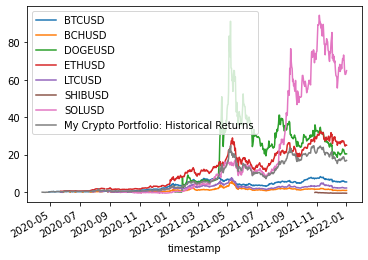

In [6]:
returns = {}

for coin in coins:
  bars = rest_api.get_crypto_bars(coin, TimeFrame.Day, "2020-01-01", "2022-01-01", exchanges=["FTXU"]).df
  bars['daily_return'] = bars['close'].pct_change()  
  cumulative_return = bars['daily_return'].add(1).cumprod().sub(1).dropna()
  returns[coin] = cumulative_return

df = pd.DataFrame(returns)
df['My Crypto Portfolio: Historical Returns'] = df.mean(axis=1)
df.plot()

In [7]:
# Calculate sharpe ration for each coin within portfolio
risk_free_rate = 0.02
sharpe_ratio = (df.iloc[-1] - risk_free_rate) / df.std()

# Sort in descending order
sharpe_ratio.sort_values(ascending=False)

ETHUSD                                     2.537916
SOLUSD                                     2.294179
My Crypto Portfolio: Historical Returns    2.117815
BTCUSD                                     2.105015
LTCUSD                                     1.470217
DOGEUSD                                    1.330127
BCHUSD                                     0.954997
SHIBUSD                                   -4.045792
dtype: float64

In [53]:
# Retrieve quote data for Bitcoin in a dataframe
bitcoin_quotes = rest_api.get_crypto_quotes('BTCUSD', '2021-01-01', '2021-01-01').df
bitcoin_quotes

,exchange,bid_price,bid_size,ask_price,ask_size
timestamp,,,,,
2021-01-01 06:00:34.874000+00:00,CBSE,29261.88,1.095177,29261.89,0.348326
2021-01-01 06:00:53.902000+00:00,CBSE,29258.50,0.570000,29258.51,2.221847
2021-01-01 06:01:34.877000+00:00,CBSE,29249.69,0.030431,29249.70,5.789483
2021-01-01 06:01:53.902000+00:00,CBSE,29264.01,0.244682,29264.02,0.004528
2021-01-01 06:02:34.878000+00:00,CBSE,29274.99,1.058986,29275.00,1.759426
...,...,...,...,...,...
2021-01-02 05:57:07.347000+00:00,CBSE,29664.97,0.583236,29667.92,0.094764
2021-01-02 05:58:03.283000+00:00,CBSE,29666.60,0.600000,29667.09,1.981680
2021-01-02 05:58:07.344000+00:00,CBSE,29667.08,3.921514,29667.09,1.761016


In [54]:
# Bars data
bitcoin_bars = rest_api.get_crypto_bars('BTCUSD', TimeFrame.Day, '2020-01-01', '2021-01-05').df
bitcoin_bars

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-01-01 06:00:00+00:00,CBSE,7174.33,7186.18,7089.00,7108.03,1357.688568,10937,7132.489436
2020-01-02 06:00:00+00:00,CBSE,6945.02,7281.24,6854.67,7203.04,4385.672853,19558,7073.061633
2020-01-03 06:00:00+00:00,CBSE,7203.04,7401.20,7176.07,7334.45,9593.744578,45872,7299.646322
2020-01-04 06:00:00+00:00,CBSE,7333.95,7398.00,7263.32,7348.63,3788.097227,28692,7325.605432
2020-01-05 06:00:00+00:00,CBSE,7355.40,7580.00,7343.17,7528.70,3362.380611,15608,7491.042016
...,...,...,...,...,...,...,...,...
2021-01-03 06:00:00+00:00,FTXU,33791.50,34820.50,32335.00,32919.00,291.519200,2155,33900.455198
2021-01-04 06:00:00+00:00,CBSE,32020.22,32890.00,30020.00,30460.19,11908.475812,105838,31772.431005
2021-01-04 06:00:00+00:00,FTXU,33013.00,33448.50,27794.00,30464.50,642.743000,2501,30211.437917


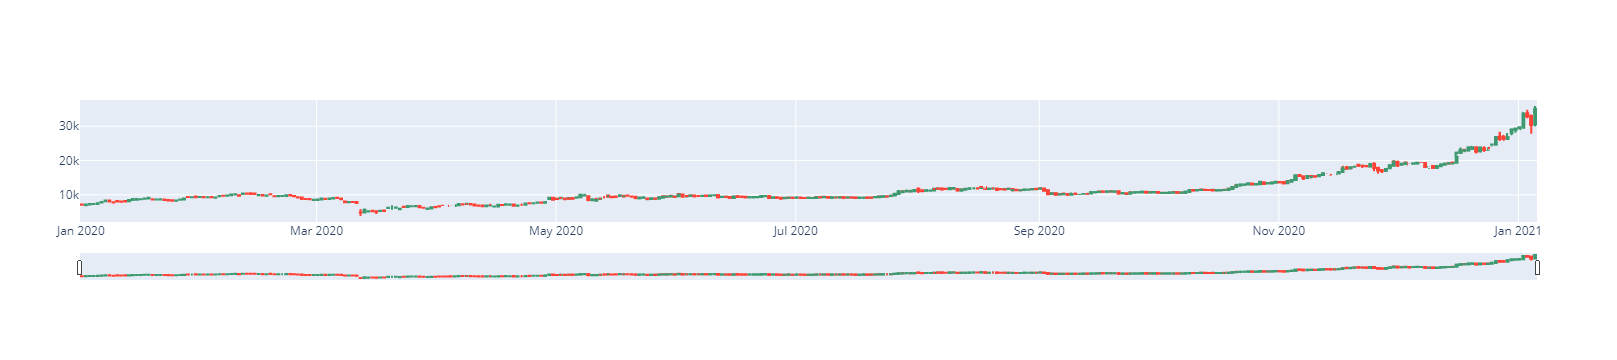

In [55]:
# Plot
candlestick_fig = go.Figure(data=[go.Candlestick(x=bitcoin_bars.index,
                open=bitcoin_bars['open'],
                high=bitcoin_bars['high'],
                low=bitcoin_bars['low'],
                close=bitcoin_bars['close'])])
candlestick_fig.show()

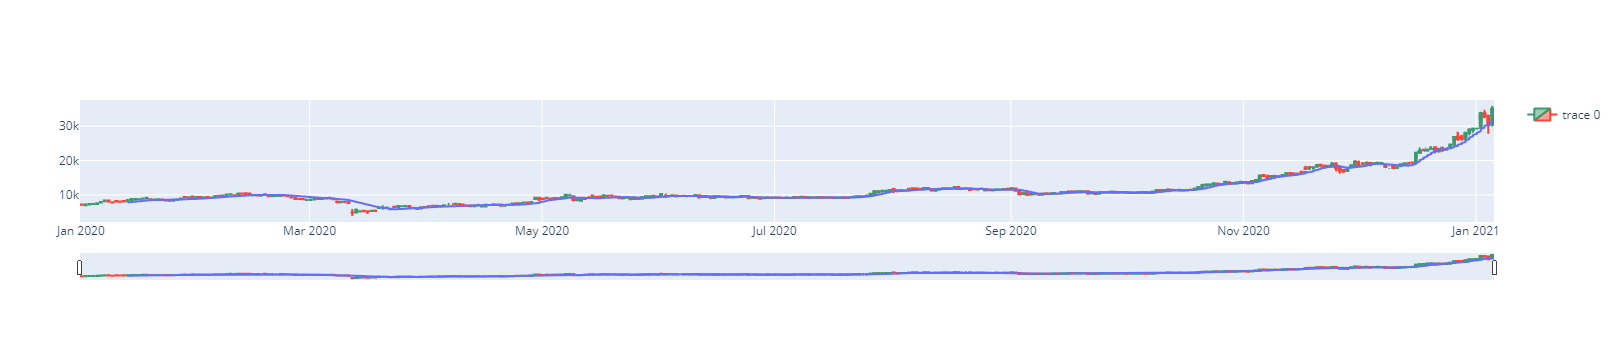

In [56]:
# 13 day SMA 
sma = bitcoin_bars['close'].rolling(13).mean().dropna()
# Create line plot for SMA
sma_fig = px.line(x=sma.index, y=sma)
# Adding both plots onto one chart
fig = go.Figure(data=candlestick_fig.data + sma_fig.data)
# Display plot
fig.show()

In [57]:
# Minute returns for bitcoin
# Alpaca for data
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame

import plotly.graph_objects as go
import plotly.express as px
# Our API keys for Alpaca
API_KEY = "YOUR_API_KEY"
API_SECRET = "YOUR_API_SECRET"

# Setup instance of alpaca api
alpaca = tradeapi.REST(API_KEY, API_SECRET)

In [58]:
# Retrieve historical minute data for Bitcoin and Coinbase stock between August 1st 2021 and November 1st 2021
btc = alpaca.get_crypto_bars("BTCUSD", TimeFrame.Minute, "2021-08-01", "2021-11-01").df
btc = btc[btc['exchange'] == 'CBSE']

coin = alpaca.get_bars("COIN", TimeFrame.Minute, "2021-08-01","2021-11-01").df


# minutely return is the percent change of minute price
btc['BTC_minutely_return'] = btc['close'].pct_change()
coin['COIN_minutely_return'] = coin['close'].pct_change()


# cumulative return is the product of each minutely return
# (1 + return_1) * (1 + return_2) * …
btc['BTC_return'] = btc['BTC_daily_return'].add(1).cumprod().sub(1)
coin['COIN_return'] = coin['COIN_daily_return'].add(1).cumprod().sub(1)

HTTPError: 403 Client Error: Forbidden for url: https://data.alpaca.markets/v1beta1/crypto/BTCUSD/bars?timeframe=1Min&start=2021-08-01&end=2021-11-01

In [ ]:
fig1 = px.line(btc, y='BTC_return', color_discrete_sequence=['red'])
fig2 = px.line(coin, y='COIN_return', color_discrete_sequence=['blue'])
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [ ]:
# calculating the spread which is the difference of returns
data['spread'] = data['BTC_return'] - data['COIN_return']

fig1 = px.line(data, y='spread',  color_discrete_sequence=['green'], render_mode='svg')

# Configuring the x-axis to hide weekends. We will be doing this often going forward.
fig1.update_xaxes(
    rangebreaks=[
        { 'pattern': 'day of week', 'bounds': [6, 1]},
        { 'pattern': 'hour', 'bounds':[23,11]}
    ])

fig1.show()

When the spread is 0, the return of Bitcoin and Coinbase are equal. When the spread is greater than 0, the return of Bitcoin is greater than Coinbase and vice versa for a spread less than 0. Notice how the spread seems to eventually revert towards 0 each time the spread’s magnitude increases. If we make the assumption that this pattern will continue, an opportunity for a trade can arise each time the spread deviates from 0.

In [ ]:
# Trading strategy
# calculating standard deviation of spread values
historical_spread_std = data['spread'].std()

# defining new column for the standard deviation 
data['spread_std'] = historical_spread_std

# defining new columns for positive and negative multiple of the standard deviation, we will use these columns for charting
data['spread_upper_std'] = 1 * data['spread_std']
data['spread_lower_std'] = -1 * data['spread_std']

In [ ]:
# Plot multiples of standard deviation to see which multiples are most relevant for strategy
# Plotting 1 multiplied with positive and negative STD in cyan
fig2 = px.line(data * 1, y=['spread_upper_std', 'spread_lower_std'], color_discrete_sequence=['cyan'], render_mode='svg')

# Plotting 2 multiplied with positive and negative STD in gray
fig3 = px.line(data * 2, y=['spread_upper_std', 'spread_lower_std'], color_discrete_sequence=['gray'], render_mode='svg')

# Plotting 3 multiplied with positive and negative STD in red
fig4 = px.line(data * 3, y=['spread_upper_std', 'spread_lower_std'], color_discrete_sequence=['red'], render_mode='svg')

# chart configurations 
fig5 = go.Figure(data=fig1.data + fig2.data + fig3.data + fig4.data)
fig5.update_xaxes(
    rangebreaks=[
        { 'pattern': 'day of week', 'bounds': [6, 1]},
        { 'pattern': 'hour', 'bounds':[23,11]}
    ])
    
fig5.show()

# Streaming Live Data via Market Data API

In [ ]:
# instance of data streaming API
alpaca_stream = Stream(API_KEY, API_SECRET)


# handler for receiving bar data for Bitcoin
async def on_crypto_bar(bar):
    if bar.exchange != 'CBSE':
        return

   print(bar)
   
# handler for receiving bar data for Coinbase stock
async def on_equity_bar(bar):
    print(bar)


# subscribe to coinbase stock data and assign handler
alpaca_stream.subscribe_bars(on_equity_bar, "COIN")


# subscribe to Bitcoin data and assign handler
alpaca_stream.subscribe_crypto_bars(on_crypto_bar, "BTCUSD")


# start streaming of data
alpaca_stream.run()

In [ ]:
# change handlers
 
async def on_equity_bar(bar):
   # bar data passed to intermediary function
   synch_datafeed(bar)
 
async def on_crypto_bar(bar):
   if bar.exchange != 'CBSE':
       return
   # bar data passed to intermediary function
   synch_datafeed(bar)

In [ ]:
 # Define dictionary to organize our data
data = {}
 
def synch_datafeed(bar):
   # convert bar timestamp to human readable form
   time = datetime.fromtimestamp(bar.timestamp / 1000000000)
   symbol = bar.symbol
 
   # If we’ve never seen this timestamp before
   if time not in data:
       # Store bar data in a dictionary keyed by symbol and wait for data from the other symbol
       data[time] = {symbol:bar}
       return
    
    # If we’ve reached this point, then we have data for both symbols for the current timestamp
    data[time][symbol] = bar
   
    # retrieve dictionary containing bar data from a single timestamp
    timeslice = data[time]
  	
   # pass that data into our next function for processing
   on_synch_data(timeslice)

# Placing Orders via Trade API

In [ ]:
def on_synch_data(data):
   # access bar data
   btc_data = data["BTCUSD"]
   coin_data = data["COIN"]
   
   # save reference of close data for each bar
   btc_close = btc_data.close
   coin_close = coin_data.close
	
   # calculate spread 
   spread = btc_close - coin_close
 
   # we will use the historical STD
   spread_std = historical_spread_std
   # calculate entry and exit levels for standard deviation
   entry_level = -1 * spread_std
   loss_exit_level = -3 * spread_std
   
   # pass spread and level data to next part for placing trades
   place_trades(spread, enty_level, loss_exit_level)

In [ ]:
def place_trades(spread, entry_level, loss_exit_level):
 
	# there is an active position if there is at least 1 position
      active_position = len(alpaca_trade.list_positions()) != 0    
 
if spread < entry_level and not active_position:
     # retrieve buying power from account details
     buying_power = alpaca_trade.get_account().buying_power
           # the buying power allocated to each asset will be half of the total
	     btc_notional_size = buying_power // 2
           coin_notional_size = buying_power // 2
           
          # place long order on BTCUSD
           alpaca_trade.submit_order(symbol="BTCUSD", notional=btc_notional_size, type='market', side='buy', time_in_force='day')
 
          # Place short order for COIN
           alpaca_trade.submit_order(symbol="COIN", notional=coin_notional_size, type='market', side='sell', time_in_force='day')
 
   elif spread < loss_exit_level and active_position:
       # liquidate if loss exit level is breached
       alpaca_trade.close_all_positions()
 
   elif spread > 0 and active_position:
       # liquidate if 0 spread is crossed with an active position
       alpaca_trade.close_all_positions()